<a href="https://colab.research.google.com/github/nathanKiwKiw/PCVK-/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mengubah tingkat kecerahan citra
--------------------
Masukkan nilai kecerahan: 50


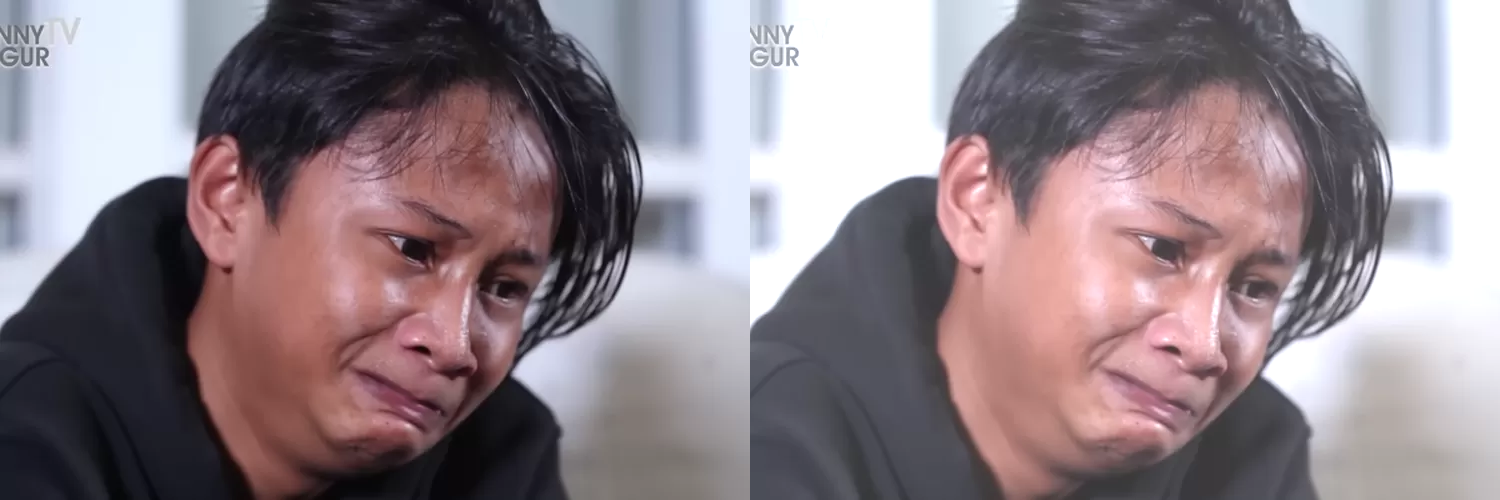

In [21]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Mengubah tingkat kecerahan citra')
print('-' * 20)

try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

image_path = '/content/drive/MyDrive/PCVK/sijelek.jpg'
original = cv.imread(image_path)

if original is None:
    print(f"Error: Gambar tidak ditemukan di path: {image_path}")
else:
    brightness_image = np.zeros(original.shape, original.dtype)

    for y in range(original.shape[0]):
        for x in range(original.shape[1]):
            for c in range(original.shape[2]):
                brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

    final_frame = cv.hconcat((original, brightness_image))
    cv2_imshow(final_frame)


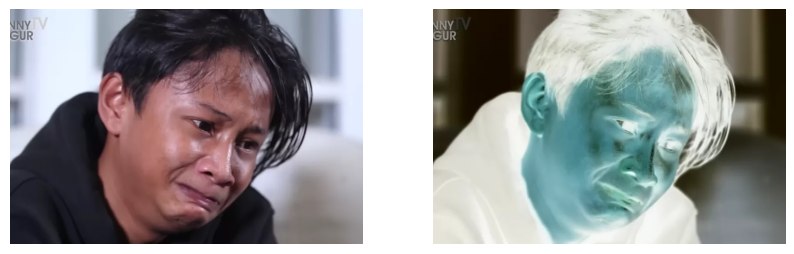

In [24]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/PCVK/sijelek.jpg'
original_image = cv2.imread(image_path)

if original_image is None:
    print("Error loading the image. Make sure the file path is correct.")
else:

    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    inverted_image = 255 - original_image_rgb

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image_rgb)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(inverted_image)
    plt.axis('off')

    plt.show()

Masukkan tingkat kecerahan [-255 to 255]: 50
Masukkan kontras [1.0 to 3.0]: 2


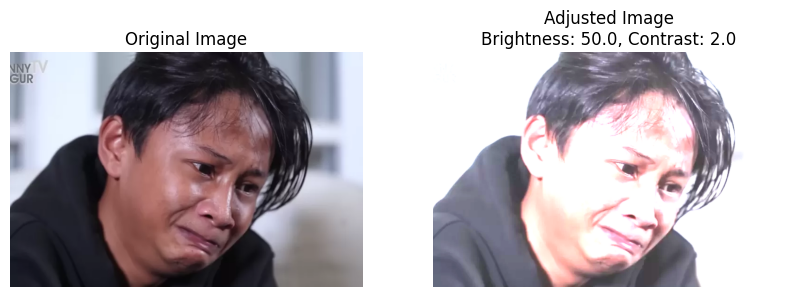

In [25]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image_path = '/content/drive/MyDrive/PCVK/sijelek.jpg'
original_image = cv2.imread(image_path)

if original_image is None:
    print("Error loading the image. Make sure the file path is correct.")
else:
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    brightness = float(input('Masukkan tingkat kecerahan [-255 to 255]: '))
    contrast = float(input('Masukkan kontras [1.0 to 3.0]: '))

    adjusted_image = cv2.convertScaleAbs(original_image_rgb, alpha=contrast, beta=brightness)

    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image_rgb)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(adjusted_image)
    plt.title(f"Adjusted Image\nBrightness: {brightness}, Contrast: {contrast}")
    plt.axis('off')

    plt.show()

Mengubah tingkat kecerahan citra dengan Transformasi Log
Masukkan nilai kecerahan: 50


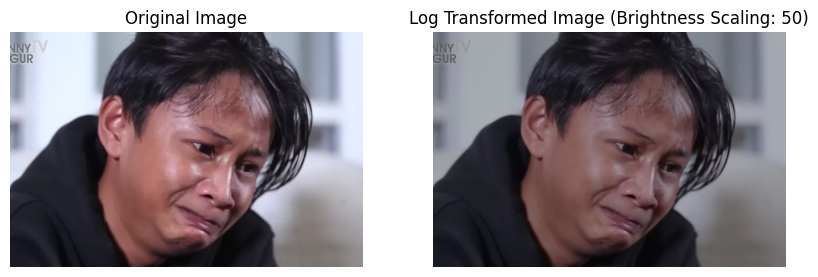

In [26]:
import cv2  # OpenCV library for image processing
import numpy as np  # NumPy library for numerical operations
import matplotlib.pyplot as plt  # To display images side by side
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Load the image
image_path = '/content/drive/MyDrive/PCVK/sijelek.jpg'  # Replace this with your actual image path
original_image = cv2.imread(image_path)

if original_image is None:
    print("Error loading the image. Make sure the file path is correct.")
else:
    # Display initial message
    print("Mengubah tingkat kecerahan citra dengan Transformasi Log")

    # Get brightness value input from the user
    try:
        brightness_input = int(input("Masukkan nilai kecerahan: "))
    except ValueError:
        print("Input tidak valid. Masukkan nilai kecerahan yang valid (angka).")
        brightness_input = 50  # Default value if input is invalid

    # Normalize the image to 0-1 range
    normalized_image = original_image / 255.0

    # Apply logarithmic transformation to each channel
    c = brightness_input / 50  # Scaling constant derived from user input
    log_transformed = c * np.log(1 + normalized_image)

    # Rescale to 0-255 range and convert to uint8
    log_transformed = np.clip(log_transformed * 255, 0, 255).astype(np.uint8)

    # Display the original and log-transformed images
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    # Log Transformed Image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(log_transformed, cv2.COLOR_BGR2RGB))
    plt.title(f"Log Transformed Image (Brightness Scaling: {brightness_input})")
    plt.axis('off')

    plt.show()

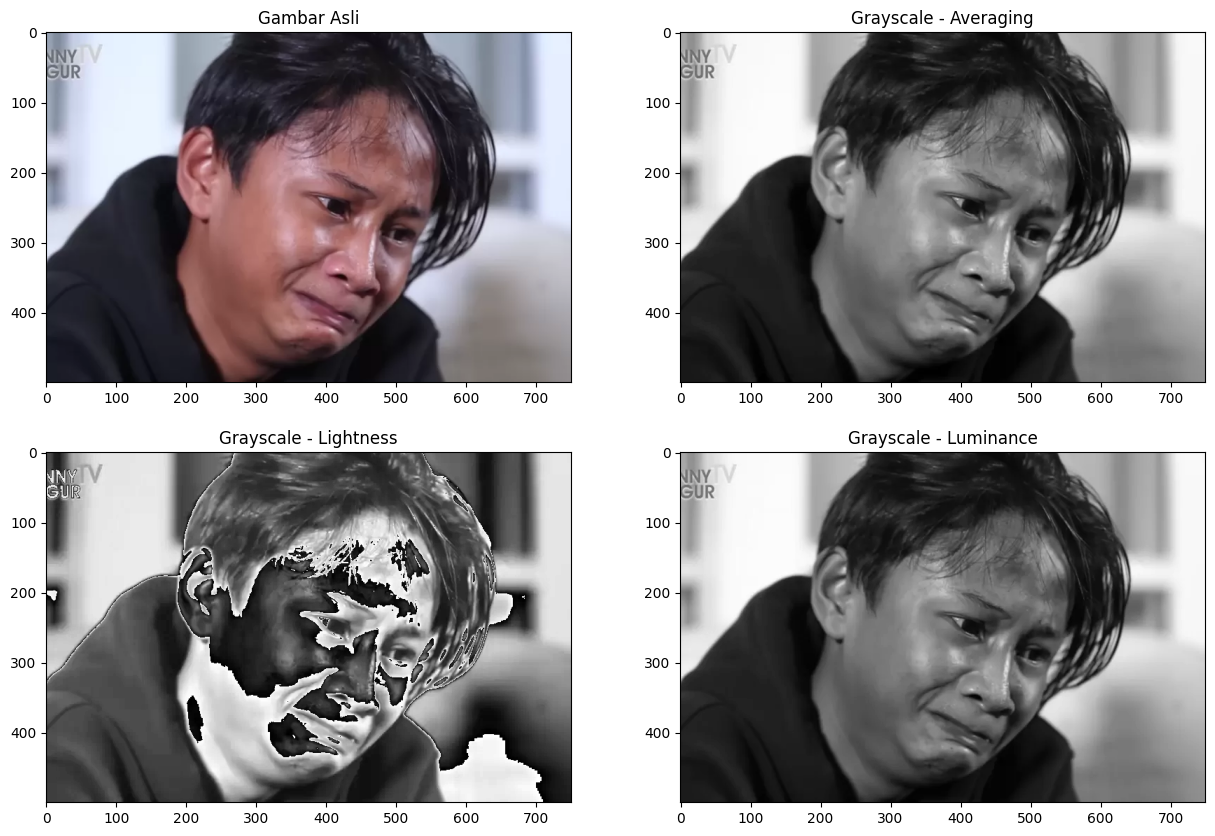

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def grayscale_averaging(image):
    return np.mean(image, axis=2).astype(np.uint8)

def grayscale_lightness(image):
    max_channel = np.max(image, axis=2)
    min_channel = np.min(image, axis=2)
    return ((max_channel + min_channel) / 2).astype(np.uint8)

def grayscale_luminance(image):
    return (0.2989 * image[:,:,2] + 0.587 * image[:,:,1] + 0.114 * image[:,:,0]).astype(np.uint8)

image_path = '/content/drive/MyDrive/PCVK/sijelek.jpg'
image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray_avg = grayscale_averaging(image_rgb)
gray_lightness = grayscale_lightness(image_rgb)
gray_luminance = grayscale_luminance(image_rgb)

plt.figure(figsize=(15, 10))

# Gambar asli
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Gambar Asli')

# Grayscale Averaging
plt.subplot(2, 2, 2)
plt.imshow(gray_avg, cmap='gray')
plt.title('Grayscale - Averaging')

# Grayscale Lightness
plt.subplot(2, 2, 3)
plt.imshow(gray_lightness, cmap='gray')
plt.title('Grayscale - Lightness')

# Grayscale Luminance
plt.subplot(2, 2, 4)
plt.imshow(gray_luminance, cmap='gray')
plt.title('Grayscale - Luminance')

plt.show()

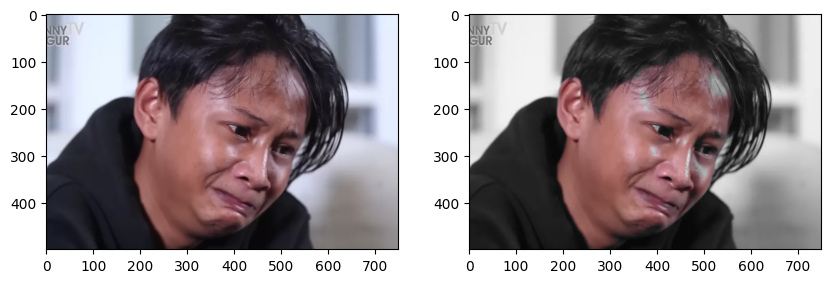

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def isolate_red_color(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_red1 = np.array([0, 50, 50])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([170, 50, 50])
    upper_red2 = np.array([180, 255, 255])

    mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
    mask = mask1 | mask2

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    gray_3_channel = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)

    result = np.where(mask[:, :, np.newaxis] == 0, gray_3_channel, image)

    return result

image_path = '/content/drive/MyDrive/PCVK/sijelek.jpg'
image = cv2.imread(image_path)
result_image = isolate_red_color(image)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.show()